# Introduction

In this project, you will build a neural modelwork of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural modelworks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/home/quyettrinh/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt
!pip install ipywidgets --upgrade


/bin/bash: python: command not found
/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
Requirement already up-to-date: ipywidgets in /home/quyettrinh/.local/lib/python3.8/site-packages (8.1.5)


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
from torch.utils.data import DataLoader
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # Normalize using MNIST mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Normalize using MNIST mean and std

# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Number of batches in training dataloader: {len(train_loader)}')
print(f'Test dataset size: {len(test_dataset)}')
print(f'Number of batches in test dataloader: {len(test_loader)}')

Training dataset size: 60000
Number of batches in training dataloader: 938
Test dataset size: 10000
Number of batches in test dataloader: 313


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

I use only Normalize transform to convert input images to tensors with value from 0 to 1.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


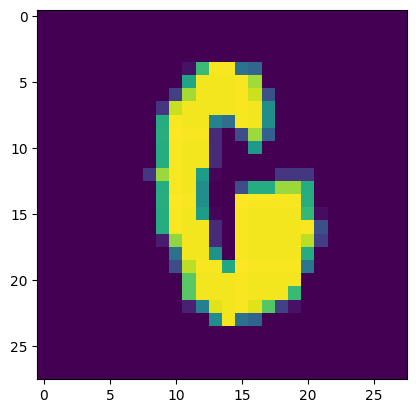

2


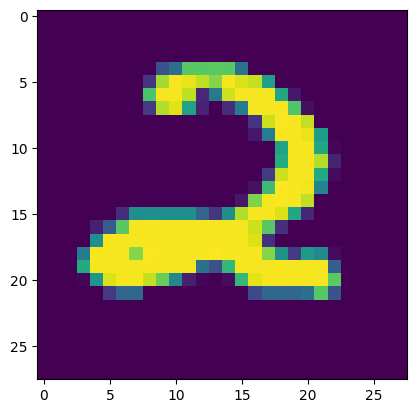

9


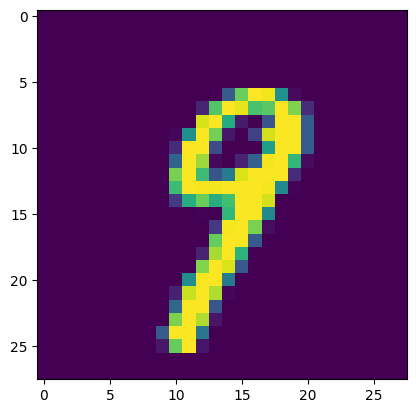

7


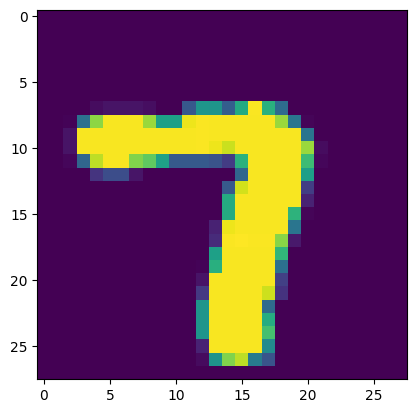

0


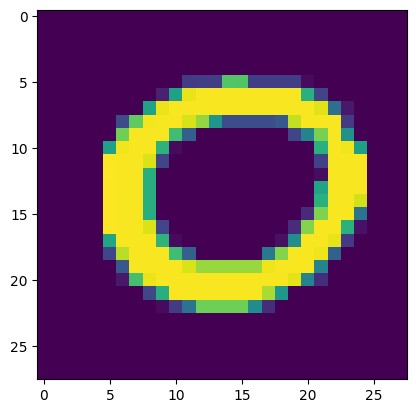

In [6]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Define layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 10)      # Output layer

    def forward(self, x):
        x = self.flatten(x)           # Flatten the input tensor
        x = F.relu(self.fc1(x))       # Apply ReLU activation after first layer
        x = self.fc2(x)               # Output layer (logits)
        return x



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## Instantiate model
model = Model()

#  loss function
criterion = nn.CrossEntropyLoss()

#  optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Move the model to the GPU if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
# number of epochs
num_epochs = 5

# creating lists for loss history
train_loss_history = list()
val_loss_history = list()

# The start of the training
for epoch in range(num_epochs):
    # putting the model in training mode
    model.train()
    # setting the epoch loss and number of correct predictions to zero
    train_loss = 0.0
    train_correct = 0
    total_predictions = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
    
        optimizer.zero_grad()
    
        outputs = model(inputs)
    
        loss = criterion(outputs, labels)
    
        loss.backward()
    
        optimizer.step()
    
        _, preds = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    print(f"Epoch {epoch + 1} training accuracy: {train_correct/total_predictions * 100:.2f}% training loss: {train_loss/len(train_loader):.5f}")
    train_loss_history.append(train_loss/len(train_loader))
    
    # The validation phase
    val_loss = 0.0
    val_correct = 0
    total_predictions = 0
    model.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f"Epoch {epoch + 1} validation accuracy: {val_correct/total_predictions * 100:.2f}% validation loss: {val_loss/len(test_loader):.5f}")
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 88.40% training loss: 0.39435
Epoch 1 validation accuracy: 92.69% validation loss: 0.23342
Epoch 2 training accuracy: 94.19% training loss: 0.19916
Epoch 2 validation accuracy: 95.43% validation loss: 0.15610
Epoch 3 training accuracy: 95.66% training loss: 0.14477
Epoch 3 validation accuracy: 96.36% validation loss: 0.12137
Epoch 4 training accuracy: 96.39% training loss: 0.11986
Epoch 4 validation accuracy: 96.75% validation loss: 0.10784
Epoch 5 training accuracy: 96.89% training loss: 0.10162
Epoch 5 validation accuracy: 96.70% validation loss: 0.11055


Plot the training loss (and validation loss/accuracy, if recorded).

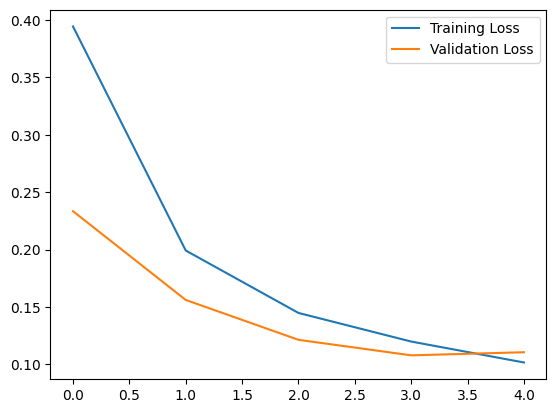

In [10]:
## YOUR CODE HERE ##
import matplotlib.pyplot as plt
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        
        # Get the index of the max probability
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 96.70%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
# Re-normalize data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # Normalize using MNIST mean and std


# Load datasets with new transformations
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define DataLoaders with new batch size
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32)

# creating lists for loss history
train_loss_history = list()
val_loss_history = list()

#  optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Move the model to the GPU if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# The start of the training
num_epochs = 10
for epoch in range(num_epochs):
    # putting the model in training mode
    model.train()
    # setting the epoch loss and number of correct predictions to zero
    train_loss = 0.0
    train_correct = 0
    total_predictions = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
    
        optimizer.zero_grad()
    
        outputs = model(inputs)
    
        loss = criterion(outputs, labels)
    
        loss.backward()
    
        optimizer.step()
    
        _, preds = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    print(f"Epoch {epoch + 1} training accuracy: {train_correct/total_predictions * 100:.2f}% training loss: {train_loss/len(train_loader):.5f}")
    train_loss_history.append(train_loss/len(train_loader))
    
    # The validation phase
    val_loss = 0.0
    val_correct = 0
    total_predictions = 0
    model.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f"Epoch {epoch + 1} validation accuracy: {val_correct/total_predictions * 100:.2f}% validation loss: {val_loss/len(test_loader):.5f}")
    val_loss_history.append(val_loss/len(test_loader))


Epoch 1 training accuracy: 97.56% training loss: 0.08181
Epoch 1 validation accuracy: 97.32% validation loss: 0.09286
Epoch 2 training accuracy: 98.10% training loss: 0.06039
Epoch 2 validation accuracy: 97.49% validation loss: 0.08650
Epoch 3 training accuracy: 98.44% training loss: 0.05055
Epoch 3 validation accuracy: 97.11% validation loss: 0.09607
Epoch 4 training accuracy: 98.59% training loss: 0.04453
Epoch 4 validation accuracy: 97.37% validation loss: 0.09010
Epoch 5 training accuracy: 98.84% training loss: 0.03702
Epoch 5 validation accuracy: 97.46% validation loss: 0.09306


## Re-Testing your model

In [13]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        
        # Get the index of the max probability
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 97.46%


## Saving your model
Using `torch.save`, save your model for future loading.

In [14]:
## YOUR CODE HERE ##

# Define the file path where you want to save your model
model_path = 'MNIST_Handwritten_Digits-STARTER.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to MNIST_Handwritten_Digits-STARTER.pth
